In [65]:
import tensorflow as tf
from glob import glob  
import os
from tensorflow.keras import models
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Activation
import matplotlib.pylab as plt

In [66]:
from tensorflow.keras.preprocessing import image

In [67]:
name_dict = {}
name_id = 0
dirname = "./data"
filenames = os.listdir(dirname)
train_img = []
train_label = []
for filename in filenames:
    full_filename = os.path.join(dirname, filename)
    if filename not in name_dict:
        name_dict[filename] = name_id
        name_id += 1
    print(os.path.join(full_filename, "*"))
    img_list = glob(os.path.join(full_filename, "*"))
    print(len(img_list))
    for img in img_list:
        train_img.append(img)
        train_label.append(name_dict[filename])
    print (full_filename)

./data\hotsix\*
300
./data\hotsix
./data\hotsixking\*
300
./data\hotsixking
./data\jinhot\*
300
./data\jinhot
./data\pepper\*
300
./data\pepper
./data\sprite\*
300
./data\sprite
./data\tgimbab\*
300
./data\tgimbab


In [68]:
train_img

['./data\\hotsix\\20200413_101054_001.jpg',
 './data\\hotsix\\20200413_101054_002.jpg',
 './data\\hotsix\\20200413_101054_003.jpg',
 './data\\hotsix\\20200413_101054_004.jpg',
 './data\\hotsix\\20200413_101054_005.jpg',
 './data\\hotsix\\20200413_101054_006.jpg',
 './data\\hotsix\\20200413_101054_007.jpg',
 './data\\hotsix\\20200413_101054_008.jpg',
 './data\\hotsix\\20200413_101054_009.jpg',
 './data\\hotsix\\20200413_101054_010.jpg',
 './data\\hotsix\\20200413_101054_011.jpg',
 './data\\hotsix\\20200413_101054_012.jpg',
 './data\\hotsix\\20200413_101054_013.jpg',
 './data\\hotsix\\20200413_101054_014.jpg',
 './data\\hotsix\\20200413_101054_015.jpg',
 './data\\hotsix\\20200413_101054_016.jpg',
 './data\\hotsix\\20200413_101054_017.jpg',
 './data\\hotsix\\20200413_101054_018.jpg',
 './data\\hotsix\\20200413_101054_019.jpg',
 './data\\hotsix\\20200413_101054_020.jpg',
 './data\\hotsix\\20200413_101054_021.jpg',
 './data\\hotsix\\20200413_101054_022.jpg',
 './data\\hotsix\\20200413_10105

In [69]:
train_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [70]:
train_datagen  = image.ImageDataGenerator(rescale = 1./255)

train_datagen = image.ImageDataGenerator(              
                                  rotation_range=15,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.5,
                                  zoom_range=[0.8, 2.0],
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')

In [71]:
training_set = train_datagen.flow_from_directory('data',
                                                 target_size = (299, 299),
                                                 batch_size = 20,
                                                class_mode="categorical"
                                                )
iterations = 10

Found 1800 images belonging to 6 classes.


In [72]:
training_set.class_indices

{'hotsix': 0,
 'hotsixking': 1,
 'jinhot': 2,
 'pepper': 3,
 'sprite': 4,
 'tgimbab': 5}

In [73]:
training_set.shuffle

True

In [74]:
base_model = InceptionV3(weights='imagenet')
x = base_model.layers[-2].output
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
predict = Dense(len(training_set.class_indices), activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = predict)

In [75]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_474 (BatchN (None, 149, 149, 32) 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_474 (Activation)     (None, 149, 149, 32) 0           batch_normalization_474[0][0]    
____________________________________________________________________________________________

In [76]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [93]:
model_path = "test.h5"
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
else:
    history = model.fit_generator(training_set, steps_per_epoch=training_set.n//training_set.batch_size,epochs=20 )
    model.save("test.h5")

In [86]:
history

In [91]:
idx_label = {}
for key in training_set.class_indices:
    idx_label[training_set.class_indices[key] ] = key 

In [87]:
name_dict = {}
name_id = 0
dirname = "./predict"
text_img = []
img_list = glob(os.path.join(dirname, "*"))
for img in img_list:
    text_img.append(img)
print(text_img)
HEIGHT = 299
WIDTH  = 299

['./predict\\20200413_101015_093.jpg', './predict\\20200413_111610.jpg', './predict\\20200413_113438.jpg', './predict\\20200413_113446.jpg', './predict\\20200413_140155.jpg', './predict\\20200413_142505.jpg', './predict\\20200413_142524.jpg']


./predict\20200413_101015_093.jpg
[3.6632914e-06 9.9999475e-01 1.2375321e-09 3.7878109e-10 1.4122143e-06
 1.6588795e-07]


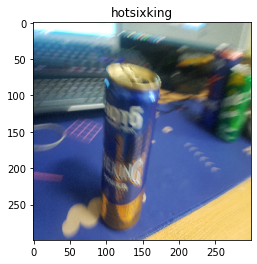

./predict\20200413_111610.jpg
[1.4489971e-05 1.9588399e-06 2.0493777e-05 9.9993122e-01 2.8665176e-05
 3.1675718e-06]


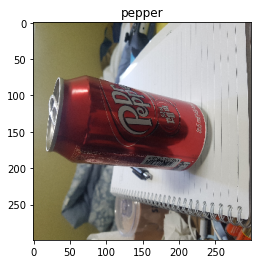

./predict\20200413_113438.jpg
[5.2603991e-03 8.6599523e-01 2.6677619e-05 7.0183276e-05 6.6435104e-03
 1.2200397e-01]


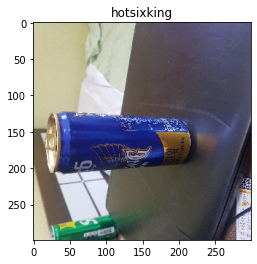

./predict\20200413_113446.jpg
[1.1266213e-06 5.6632041e-07 3.1315111e-07 1.4284709e-05 9.9998069e-01
 2.9701548e-06]


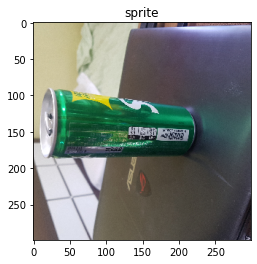

./predict\20200413_140155.jpg
[9.4703287e-01 1.3468576e-04 8.7441001e-03 4.3071400e-02 3.5631479e-04
 6.6064036e-04]


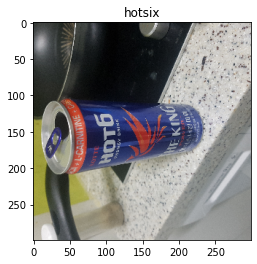

./predict\20200413_142505.jpg
[3.7613850e-11 1.0719559e-11 3.6218986e-12 7.5170439e-09 1.1200554e-12
 1.0000000e+00]


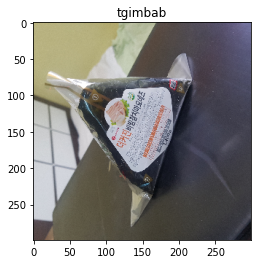

./predict\20200413_142524.jpg
[9.4664927e-12 7.5041190e-10 1.0000000e+00 2.6878459e-09 7.2661730e-09
 1.3780714e-10]


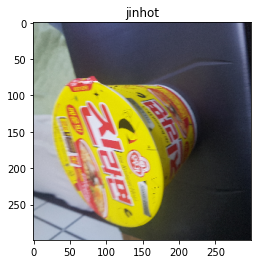

In [92]:
for img_path in text_img:
    img = image.load_img(img_path, target_size=(HEIGHT, WIDTH))
    x = image.img_to_array(img)
    # Expand to 2D array
    x = np.expand_dims(x, axis=0)
    #print(x.shape)
    #idx_label[np.argmax( model.predict(x))]
    print(img_path)
    print(model.predict(x)[0])
    plt.title(idx_label[np.argmax( model.predict(x)[0])])
    plt.imshow(img)
    plt.show()